In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("./Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# 初始化參數
N = 10000  # 使用者訪問次數（總共的輪次）
d = 10  # 廣告數量
ads_selected = []  # 儲存每次選擇的廣告索引
numbers_of_rewards_1 = [0] * d  # 每個廣告的正回饋數（reward=1）
numbers_of_rewards_0 = [0] * d  # 每個廣告的負回饋數（reward=0）
total_reward = 0  # 總回饋

In [4]:
import random

# 開始每一輪的選擇與更新
for n in range(0, N):  # 模擬 N 次訪問
    ad = 0  # 初始化本次選擇的廣告索引
    max_random = 0  # 初始化當前最大隨機抽樣值

    # 對每個廣告進行隨機抽樣，選擇最大值的廣告
    for i in range(0, d):
        # 使用 Beta 分布產生隨機值，表示該廣告的成功率
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:  # 更新當前最大值
            max_random = random_beta
            ad = i  # 將當前廣告索引設為本輪選擇的廣告

    ads_selected.append(ad)  # 記錄本輪選擇的廣告

    # 根據實際數據判斷回饋（reward）
    reward = dataset.values[n, ad]  # 從資料集中獲取第 n 次訪問選擇該廣告的回饋
    if reward == 1:
        # 如果回饋為 1，更新該廣告的正回饋次數
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        # 如果回饋為 0，更新該廣告的負回饋次數
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

    # 更新總回饋
    total_reward = total_reward + reward


Visualising the results - Histogram

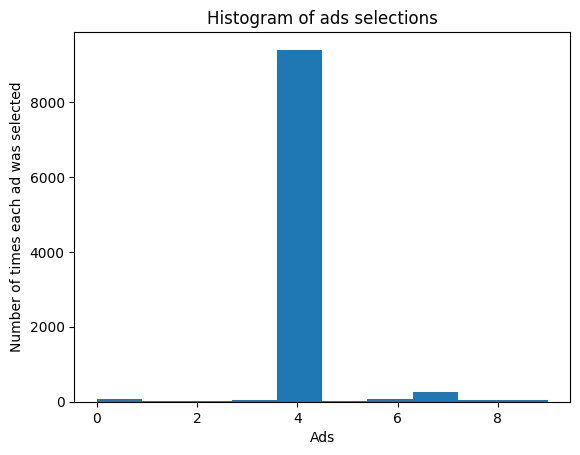

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()